# Experiment Design Exercise 2
Hartmann, Fabian  
01015083 Hepp, Sebastian  
Mayr, Yifan  
11810738 Moik, Matthias

## Set up

In [2]:
!git clone https://github.com/e11824496/ExpDesign_WS22.git

Cloning into 'ExpDesign_WS22'...
remote: Enumerating objects: 117, done.
remote: Counting objects: 100% (67/67), done.
remote: Compressing objects: 100% (50/50), done.
remote: Total 117 (delta 36), reused 44 (delta 16), pack-reused 50
Receiving objects: 100% (117/117), 44.13 MiB | 24.98 MiB/s, done.
Resolving deltas: 100% (42/42), done.


In [3]:
%cd ExpDesign_WS22/UltraGCN/

/content/ExpDesign_WS22/UltraGCN


In [4]:
import numpy as np

def print_eval(recall_reprod, ndcg_reprod, recall_paper, ndcg_paper, n_epochs_paper, n_epochs_reprod):
    recall_reprod_off_by = (recall_reprod - recall_paper) / recall_paper
    ndcg_reprod_off_by = (ndcg_reprod - ndcg_paper) / ndcg_paper
    diff_epochs = n_epochs_paper - n_epochs_reprod

    print(f"reproduced recall off by {round(recall_reprod_off_by * 100, 2)}%")
    print(f"reproduced NDCG off by {round(ndcg_reprod_off_by * 100, 2)}%")
    print()
    print(f"difference in epochs needed when reproducing: {diff_epochs} epochs or {round((diff_epochs) / n_epochs_reprod * 100, 2)}%")


#92000 items, 52000 users
def sample_amazon_set(user_cutoff, item_cutoff, seed = 42):
    train_file = open("data/amazon/train.txt","r+")
    train_data = train_file.readlines()
    test_file = open("data/amazon/test.txt","r+")
    test_data = test_file.readlines()
    item_list = open("data/amazon/item_list.txt","r+")
    n_items = len(item_list.readlines())-1

    np.random.seed(seed)
    sampled_items = {k: i for i, k in enumerate(np.random.choice(np.arange(n_items), item_cutoff, replace = False))}

    train_file_out = open("data/amazon_sampled/train.txt", "w")
    test_file_out = open("data/amazon_sampled/test.txt", "w")


    current_line = 0
    current_user_id = 0
    while current_user_id < user_cutoff and current_line < len(train_data):
        line = train_data[current_line]
        current_user_items_train = [int(x) for x in line.split()[1:]]
        current_user_items_train_filterd = [sampled_items[x] for x in current_user_items_train if x in sampled_items]
        
        line = test_data[current_line]
        current_user_items_test = [int(x) for x in line.split()[1:]]
        current_user_items_test_filterd = [sampled_items[x] for x in current_user_items_test if x in sampled_items]

        if len(current_user_items_train_filterd) < 5 or len(current_user_items_test_filterd) < 2: 
            current_line += 1
            continue
        else:
            train_file_out.write(" ".join(map(str,[current_user_id] + current_user_items_train_filterd)) + '\n')
            test_file_out.write(" ".join(map(str,[current_user_id] + current_user_items_test_filterd)) + '\n')
            current_user_id += 1
            current_line += 1

    print(f'Number of users: {current_user_id}')
  
    

## Reproducing ML-1M results

In [9]:
import main_custom_parameters as main

In [ ]:
main.run('ml-1m_config.ini')

###################### UltraGCN ######################
1. Loading Configuration...


/usr/local/lib/python3.8/dist-packages/torch/utils/data/dataloader.py:554: UserWarning: This DataLoader will create 5 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


Computing \Omega for the item-item graph... 
i-i constraint matrix 0 ok
Computation \Omega OK!
store object in path = ./ml-1m_ii_neighbor_mat_10 ok
store object in path = ./ml-1m_ii_constraint_mat_10 ok
Load Configuration OK, show them below
Configuration:
{'embedding_dim': 128, 'ii_neighbor_num': 10, 'model_save_path': './ultragcn_ml-1m.pt', 'max_epoch': 2000, 'enable_tensorboard': True, 'initial_weight': 0.001, 'dataset': 'ml-1m', 'train_file_path': './data/ml-1m/train.txt', 'gpu': '0', 'learning_rate': 0.001, 'batch_size': 1024, 'early_stop_epoch': 50, 'w1': 1e-07, 'w2': 1.0, 'w3': 1e-07, 'w4': 1.0, 'negative_num': 200, 'negative_weight': 200.0, 'gamma': 0.0001, 'lambda': 0.001, 'sampling_sift_pos': False, 'test_batch_size': 2048, 'topk': 20, 'test_file_path': './data/ml-1m/test.txt', 'device': device(type='cuda', index=0), 'user_num': 6022, 'item_num': 3043}
Total training batches = 778


/usr/local/lib/python3.8/dist-packages/torch/utils/data/dataloader.py:554: UserWarning: This DataLoader will create 5 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


The time for epoch 0 is: train time = 00: 00: 10, test time = 00: 00: 01
Loss = 21.25471, F1-score: 0.091753 	 Precision: 0.07649	 Recall: 0.11464	NDCG: 0.11558
The time for epoch 5 is: train time = 00: 00: 10, test time = 00: 00: 00
Loss = 16.79668, F1-score: 0.090951 	 Precision: 0.07589	 Recall: 0.11347	NDCG: 0.11486
The time for epoch 10 is: train time = 00: 00: 10, test time = 00: 00: 00
Loss = 16.97693, F1-score: 0.091365 	 Precision: 0.07588	 Recall: 0.11479	NDCG: 0.11401
The time for epoch 15 is: train time = 00: 00: 10, test time = 00: 00: 00
Loss = 17.40684, F1-score: 0.128047 	 Precision: 0.10673	 Recall: 0.16002	NDCG: 0.16888
The time for epoch 20 is: train time = 00: 00: 10, test time = 00: 00: 00
Loss = 16.97007, F1-score: 0.159057 	 Precision: 0.12943	 Recall: 0.20627	NDCG: 0.20744
The time for epoch 25 is: train time = 00: 00: 11, test time = 00: 00: 00
Loss = 17.08687, F1-score: 0.172493 	 Precision: 0.13814	 Recall: 0.22958	NDCG: 0.22540
The time for epoch 30 is: trai

In [ ]:
recall_paper = 0.2787
ndcg_paper = 0.2642
epochs_paper = 136

recall_reprod = 0.2776111303103336
ndcg_reprod = 0.2628752288965452
epochs_reprod = 129

print_eval(recall_reprod, ndcg_reprod, recall_paper, ndcg_paper, epochs_paper, epochs_reprod)

reproduced recall off by -0.39%
reproduced NDCG off by -0.5%

difference in epochs needed when reproducing: 0 epochs or 0.0%


## Reproducing Amazon results (sampled dataset due to RAM constraints)

In [14]:
#sample_amazon_set(17547, 30863) # 33% of users and items
sample_amazon_set(21057, 36640) # 40% of users and items

Number of users: 21057


In [7]:
main.run('amazon_sampled_config.ini')

###################### UltraGCN ######################
1. Loading Configuration...


/usr/local/lib/python3.8/dist-packages/torch/utils/data/dataloader.py:554: UserWarning: This DataLoader will create 5 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


Computing \Omega for the item-item graph... 


/content/ExpDesign_WS22/UltraGCN/main_custom_parameters.py:95: RuntimeWarning: divide by zero encountered in true_divide
  beta_uD = (np.sqrt(users_D + 1) / users_D).reshape(-1, 1)


i-i constraint matrix 0 ok
i-i constraint matrix 15000 ok
i-i constraint matrix 30000 ok
Computation \Omega OK!
store object in path = ./amazon_sampled_ii_neighbor_mat_10 ok
store object in path = ./amazon_sampled_ii_constraint_mat_10 ok
Load Configuration OK, show them below
Configuration:
{'embedding_dim': 64, 'ii_neighbor_num': 10, 'model_save_path': './ultragcn_amazon_sampled.pt', 'max_epoch': 2000, 'enable_tensorboard': True, 'initial_weight': 0.0001, 'dataset': 'amazon_sampled', 'train_file_path': './data/amazon_sampled/train.txt', 'gpu': '0', 'learning_rate': 0.001, 'batch_size': 1024, 'early_stop_epoch': 15, 'w1': 1e-08, 'w2': 1.0, 'w3': 1.0, 'w4': 1e-08, 'negative_num': 500, 'negative_weight': 500.0, 'gamma': 0.0001, 'lambda': 2.75, 'sampling_sift_pos': False, 'test_batch_size': 2048, 'topk': 20, 'test_file_path': './data/amazon_sampled/test.txt', 'device': device(type='cuda', index=0), 'user_num': 21057, 'item_num': 36640}
Total training batches = 493


/usr/local/lib/python3.8/dist-packages/torch/utils/data/dataloader.py:554: UserWarning: This DataLoader will create 5 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


The time for epoch 0 is: train time = 00: 00: 14, test time = 00: 00: 08
Loss = 26009.67773, F1-score: 0.001783 	 Precision: 0.00113	 Recall: 0.00429	NDCG: 0.00407
The time for epoch 5 is: train time = 00: 00: 11, test time = 00: 00: 05
Loss = 1747.20483, F1-score: 0.004798 	 Precision: 0.00302	 Recall: 0.01169	NDCG: 0.00795
The time for epoch 10 is: train time = 00: 00: 12, test time = 00: 00: 05
Loss = 1577.30396, F1-score: 0.004786 	 Precision: 0.00300	 Recall: 0.01177	NDCG: 0.00788
The time for epoch 15 is: train time = 00: 00: 12, test time = 00: 00: 05
Loss = 1511.96423, F1-score: 0.004791 	 Precision: 0.00301	 Recall: 0.01180	NDCG: 0.00807
The time for epoch 20 is: train time = 00: 00: 11, test time = 00: 00: 05
Loss = 1501.38989, F1-score: 0.004253 	 Precision: 0.00268	 Recall: 0.01035	NDCG: 0.00723
The time for epoch 25 is: train time = 00: 00: 11, test time = 00: 00: 05
Loss = 1490.27222, F1-score: 0.005038 	 Precision: 0.00318	 Recall: 0.01217	NDCG: 0.00796
The time for epoc

In [10]:
recall_paper = 0.0681
ndcg_paper = 0.0556
epochs_paper = 86

recall_reprod = 0.057421455844465494
ndcg_reprod = 0.03728846210162489
epochs_reprod = 85

print_eval(recall_reprod, ndcg_reprod, recall_paper, ndcg_paper, epochs_paper, epochs_reprod)

reproduced recall off by -15.68%
reproduced NDCG off by -32.93%

difference in epochs needed when reproducing: 1 epochs or 1.18%


## Ablation study
disable different parameters by overwriting:
1. lambda = 0, gamma = 0
1. lambda = 0
1. gamma = 0

In [9]:
custom_params = {
    'gamma': 0, 
    'lambda': 0
}
main.run('amazon_sampled_config.ini', custom_params, report_progress=False)

###################### UltraGCN ######################
1. Loading Configuration...
load path = ./amazon_sampled_ii_constraint_mat_10 object
load path = ./amazon_sampled_ii_neighbor_mat_10 object
Load Configuration OK, show them below
Configuration:
{'embedding_dim': 64, 'ii_neighbor_num': 10, 'model_save_path': './ultragcn_amazon_sampled.pt', 'max_epoch': 2000, 'enable_tensorboard': True, 'initial_weight': 0.0001, 'dataset': 'amazon_sampled', 'train_file_path': './data/amazon_sampled/train.txt', 'gpu': '0', 'learning_rate': 0.001, 'batch_size': 1024, 'early_stop_epoch': 15, 'w1': 1e-08, 'w2': 1.0, 'w3': 1.0, 'w4': 1e-08, 'negative_num': 500, 'negative_weight': 500.0, 'gamma': 0.0, 'lambda': 0.0, 'sampling_sift_pos': False, 'test_batch_size': 2048, 'topk': 20, 'test_file_path': './data/amazon_sampled/test.txt', 'device': device(type='cuda', index=0), 'user_num': 21057, 'item_num': 36640}
Total training batches = 493
##########################################
Early stop is triggered at 8

In [10]:
custom_params = {
    'lambda': 0
}
main.run('amazon_sampled_config.ini', custom_params, report_progress=False)

###################### UltraGCN ######################
1. Loading Configuration...
load path = ./amazon_sampled_ii_constraint_mat_10 object
load path = ./amazon_sampled_ii_neighbor_mat_10 object
Load Configuration OK, show them below
Configuration:
{'embedding_dim': 64, 'ii_neighbor_num': 10, 'model_save_path': './ultragcn_amazon_sampled.pt', 'max_epoch': 2000, 'enable_tensorboard': True, 'initial_weight': 0.0001, 'dataset': 'amazon_sampled', 'train_file_path': './data/amazon_sampled/train.txt', 'gpu': '0', 'learning_rate': 0.001, 'batch_size': 1024, 'early_stop_epoch': 15, 'w1': 1e-08, 'w2': 1.0, 'w3': 1.0, 'w4': 1e-08, 'negative_num': 500, 'negative_weight': 500.0, 'gamma': 0.0001, 'lambda': 0.0, 'sampling_sift_pos': False, 'test_batch_size': 2048, 'topk': 20, 'test_file_path': './data/amazon_sampled/test.txt', 'device': device(type='cuda', index=0), 'user_num': 21057, 'item_num': 36640}
Total training batches = 493
##########################################
Early stop is triggered a

In [11]:
custom_params = {
    'gamma': 0 
}
main.run('amazon_sampled_config.ini', custom_params, report_progress=False)

###################### UltraGCN ######################
1. Loading Configuration...
load path = ./amazon_sampled_ii_constraint_mat_10 object
load path = ./amazon_sampled_ii_neighbor_mat_10 object
Load Configuration OK, show them below
Configuration:
{'embedding_dim': 64, 'ii_neighbor_num': 10, 'model_save_path': './ultragcn_amazon_sampled.pt', 'max_epoch': 2000, 'enable_tensorboard': True, 'initial_weight': 0.0001, 'dataset': 'amazon_sampled', 'train_file_path': './data/amazon_sampled/train.txt', 'gpu': '0', 'learning_rate': 0.001, 'batch_size': 1024, 'early_stop_epoch': 15, 'w1': 1e-08, 'w2': 1.0, 'w3': 1.0, 'w4': 1e-08, 'negative_num': 500, 'negative_weight': 500.0, 'gamma': 0.0, 'lambda': 2.75, 'sampling_sift_pos': False, 'test_batch_size': 2048, 'topk': 20, 'test_file_path': './data/amazon_sampled/test.txt', 'device': device(type='cuda', index=0), 'user_num': 21057, 'item_num': 36640}
Total training batches = 493
##########################################
Early stop is triggered at 

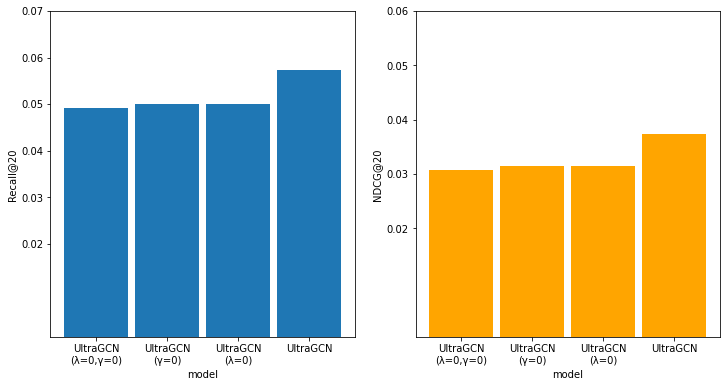

In [11]:
import numpy as np
import matplotlib.pyplot as plt

n = 4
model_names = ['UltraGCN\n(\u03BB=0,\u03B3=0)', 'UltraGCN\n(\u03B3=0)', 'UltraGCN\n(\u03BB=0)', 'UltraGCN']
recall_results = [0.04918000384021738, 0.050109096677435815, 0.050109096677435815, recall_reprod]
ndcg_results = [0.030738173917234976, 0.031403093994895125, 0.031403093994895125, ndcg_reprod]

plt_, ax = plt.subplots(1, 2, figsize=(12,6))
ax[0].bar(range(n), recall_results, width=0.9, tick_label=model_names)
ax[0].set_xticks(range(n))
ax[0].set_yticks(np.arange(0.02, 0.08, 0.01))
ax[0].set_xlabel('model')
ax[0].set_ylabel('Recall@20')

ax[1].bar(range(n), ndcg_results, width=0.9, color='orange', tick_label=model_names)
ax[1].set_xticks(range(n))
ax[1].set_yticks(np.arange(0.02, 0.07, 0.01))
ax[1].set_xlabel('model')
ax[1].set_ylabel('NDCG@20')

plt.show()

## Parameter Influence

Appying different parameter settings. 

for K = [5, 10, 20, 50]

In [4]:
custom_params = {
    'ii_neighbor_num': 5 
}
main.run('amazon_sampled_config.ini', custom_params, report_progress=False)

###################### UltraGCN ######################
1. Loading Configuration...


/usr/local/lib/python3.8/dist-packages/torch/utils/data/dataloader.py:554: UserWarning: This DataLoader will create 5 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


load path = ./amazon_sampled_ii_constraint_mat_5 object
load path = ./amazon_sampled_ii_neighbor_mat_5 object
Load Configuration OK, show them below
Configuration:
{'embedding_dim': 64, 'ii_neighbor_num': 5, 'model_save_path': './ultragcn_amazon_sampled.pt', 'max_epoch': 2000, 'enable_tensorboard': True, 'initial_weight': 0.0001, 'dataset': 'amazon_sampled', 'train_file_path': './data/amazon_sampled/train.txt', 'gpu': '0', 'learning_rate': 0.001, 'batch_size': 1024, 'early_stop_epoch': 15, 'w1': 1e-08, 'w2': 1.0, 'w3': 1.0, 'w4': 1e-08, 'negative_num': 500, 'negative_weight': 500.0, 'gamma': 0.0001, 'lambda': 2.75, 'sampling_sift_pos': False, 'test_batch_size': 2048, 'topk': 20, 'test_file_path': './data/amazon_sampled/test.txt', 'device': device(type='cuda', index=0), 'user_num': 21057, 'item_num': 36640}
Total training batches = 493


/usr/local/lib/python3.8/dist-packages/torch/utils/data/dataloader.py:554: UserWarning: This DataLoader will create 5 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


##########################################
Early stop is triggered at 79 epochs.
Results:
best epoch = 64, best recall = 0.05807551680906002, best ndcg = 0.03806443018640664
The best model is saved at ./ultragcn_amazon_sampled.pt
Training end!
END


In [ ]:
custom_params = {
    'ii_neighbor_num': 10 
}
main.run('amazon_sampled_config.ini', custom_params)

###################### UltraGCN ######################
1. Loading Configuration...


/usr/local/lib/python3.8/dist-packages/torch/utils/data/dataloader.py:554: UserWarning: This DataLoader will create 5 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


load path = ./amazon_sampled_ii_constraint_mat_10 object
load path = ./amazon_sampled_ii_neighbor_mat_10 object
Load Configuration OK, show them below
Configuration:
{'embedding_dim': 64, 'ii_neighbor_num': 10, 'model_save_path': './ultragcn_amazon_sampled.pt', 'max_epoch': 2000, 'enable_tensorboard': True, 'initial_weight': 0.0001, 'dataset': 'amazon_sampled', 'train_file_path': './data/amazon_sampled/train.txt', 'gpu': '0', 'learning_rate': 0.001, 'batch_size': 1024, 'early_stop_epoch': 15, 'w1': 1e-08, 'w2': 1.0, 'w3': 1.0, 'w4': 1e-08, 'negative_num': 500, 'negative_weight': 500.0, 'gamma': 0.0001, 'lambda': 2.75, 'sampling_sift_pos': False, 'test_batch_size': 2048, 'topk': 20, 'test_file_path': './data/amazon_sampled/test.txt', 'device': device(type='cpu'), 'user_num': 21057, 'item_num': 36640}
Total training batches = 493
The time for epoch 0 is: train time = 00: 03: 01, test time = 00: 00: 07
Loss = 23741.62695, F1-score: 0.003005 	 Precision: 0.00189	 Recall: 0.00733	NDCG: 0.00

In [ ]:
custom_params = {
    'ii_neighbor_num': 20 
}
main.run('amazon_sampled_config.ini', custom_params, report_progress=False)

In [ ]:
custom_params = {
    'ii_neighbor_num': 50 
}
main.run('amazon_sampled_config.ini', custom_params, report_progress=False)

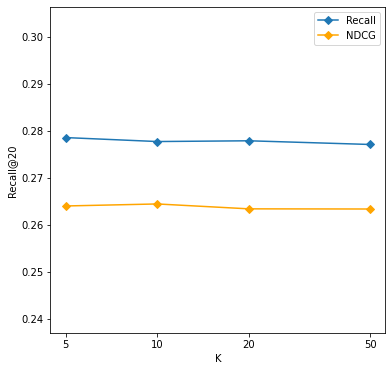

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

n = 4
k= [5, 10, 20, 50]
recall_results = []
ndcg_results = []

plt_, ax = plt.subplots(1, 1, figsize=(6,6))
ax.plot(k, recall_results, marker='D')
ax.set_ylim(min(recall_results + ndcg_results)*0.9, max(recall_results + ndcg_results)*1.1)
ax.set_xscale('log')
ax.set_xticks(k)
ax.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
ax.minorticks_off()
ax.set_xlabel('K')
ax.set_ylabel('Recall@20')
ax.plot(k, ndcg_results, color = 'orange', marker='D')
ax.legend(['Recall', 'NDCG'])

plt.show()